# Homework 1 STA365

## Question 1

$$
P(\text{Pass} | \text{Quick}) = \frac{P(\text{Quick} | \text{Pass}) \cdot P(\text{Pass})}{P(\text{Quick})}
$$

Using the **law of total probability**:

$$
P(\text{Quick}) = P(\text{Quick} | \text{Pass}) \cdot P(\text{Pass}) + P(\text{Quick} | \text{Fail}) \cdot P(\text{Fail})
$$

Substitute the values:

$$
P(\text{Quick}) = (0.6 \cdot 0.9) + (0.3 \cdot 0.1)
$$

$$
P(\text{Quick}) = 0.54 + 0.03 = 0.57
$$

Now, apply Bayes' Theorem:

$$
P(\text{Pass} | \text{Quick}) = \frac{P(\text{Quick} | \text{Pass}) \cdot P(\text{Pass})}{P(\text{Quick})}
$$

Substitute the values:

$$
P(\text{Pass} | \text{Quick}) = \frac{(0.6 \cdot 0.9)}{0.57}
$$

$$
P(\text{Pass} | \text{Quick}) = \frac{0.54}{0.57} \approx 0.947
$$


## Question 2

### Derivation of the Posterior Distribution

1. **Multinomial Likelihood**:
$$
P(\mathbf{x} | \boldsymbol{\theta}, n) = \frac{\Gamma \left( \sum_{i=1}^n x_i + 1 \right)}{\prod_{i=1}^n \Gamma(x_i + 1)} \prod_{i=1}^n \theta_i^{x_i}
$$

2. **Dirichlet Prior**:
$$
P(\boldsymbol{\theta} | \boldsymbol{\alpha}) = \frac{\Gamma \left( \sum_{i=1}^n \alpha_i \right)}{\prod_{i=1}^n \Gamma(\alpha_i)} \prod_{i=1}^n \theta_i^{\alpha_i - 1}
$$

3. **Bayes' Theorem**:
$$
P(\boldsymbol{\theta} | \mathbf{x}, n, \boldsymbol{\alpha}) = \frac{P(\mathbf{x} | \boldsymbol{\theta}, n) P(\boldsymbol{\theta} | \boldsymbol{\alpha})}{P(\mathbf{x})}
$$

Substitute the likelihood and prior:
$$
P(\boldsymbol{\theta} | \mathbf{x}, n, \boldsymbol{\alpha}) \propto \left[ \prod_{i=1}^n \theta_i^{x_i} \right] \cdot \left[ \prod_{i=1}^n \theta_i^{\alpha_i - 1} \right]
$$

Simplify:
$$
P(\boldsymbol{\theta} | \mathbf{x}, n, \boldsymbol{\alpha}) \propto \prod_{i=1}^n \theta_i^{x_i + \alpha_i - 1}
$$

4. **Posterior Distribution**:
$$
P(\boldsymbol{\theta} | \mathbf{x}, n, \boldsymbol{\alpha}) = \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_n + x_n)
$$

---

### Conclusion

The posterior remains a **Dirichlet distribution**, where the parameters are updated from $$\alpha_i$$ to $$\alpha_i + x_i$$


## Question 3 

In [11]:
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np
import matplotlib.pyplot as plt

### Step 1: Sample from a three-category multinomial distribution

In [42]:
n_trials = 100 # Number of trials
probabilities = [0.35, 0.35, 0.30]  # Probabilities for three categories
sample = stats.multinomial.rvs(n=n_trials, p=probabilities, size=1)[0]  # Sample

### Visualize the multinomial distribution and sample

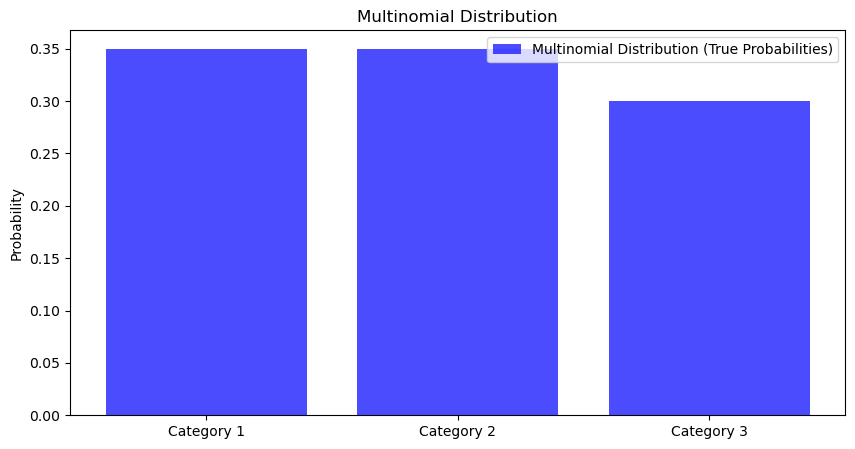

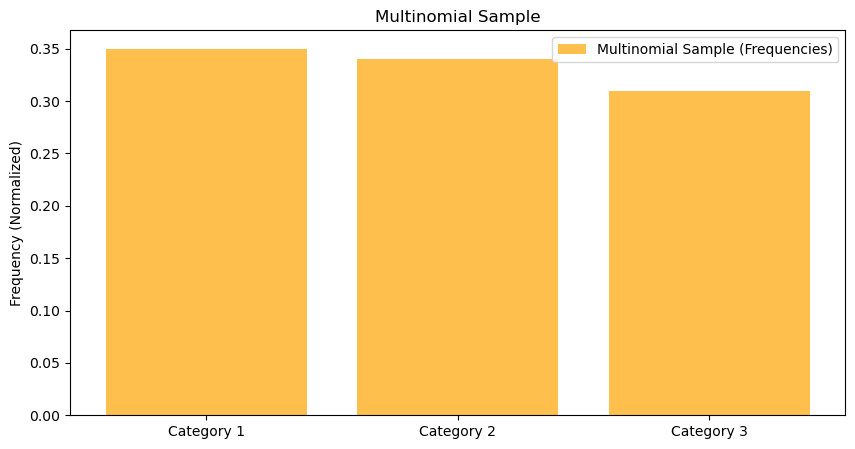

In [47]:
# Visualize the multinomial distribution (True Probabilities)
categories = ['Category 1', 'Category 2', 'Category 3']
plt.figure(figsize=(10, 5))
plt.bar(categories, probabilities, alpha=0.7, color='blue', label='Multinomial Distribution (True Probabilities)')
plt.ylabel('Probability')
plt.title('Multinomial Distribution')
plt.legend()
plt.show("png")

# Visualize the multinomial sample (Frequencies)
plt.figure(figsize=(10, 5))
plt.bar(categories, sample / n_trials, alpha=0.7, color='orange', label='Multinomial Sample (Frequencies)')
plt.ylabel('Frequency (Normalized)')
plt.title('Multinomial Sample')
plt.legend()
plt.show("png")

### Step 2: Define the Dirichlet prior

In [44]:
alpha_prior = np.array([2, 2, 2])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

### Step 3: Update to the posterior using the multinomial sample

In [45]:
alpha_posterior = alpha_prior + sample  # Posterior parameters
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)

### Step 4: Visualize the Dirichlet prior and posterior using a ternary plot

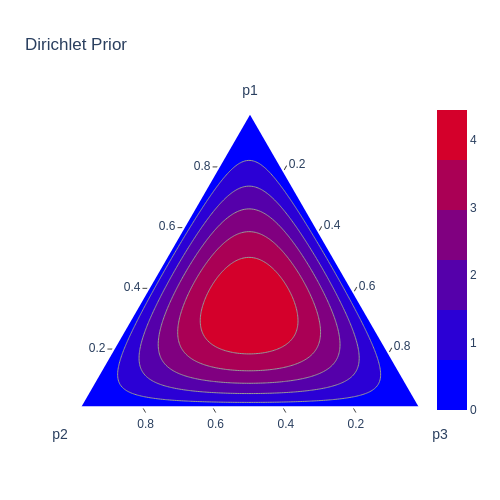

Prior Parameters:  [2 2 2]


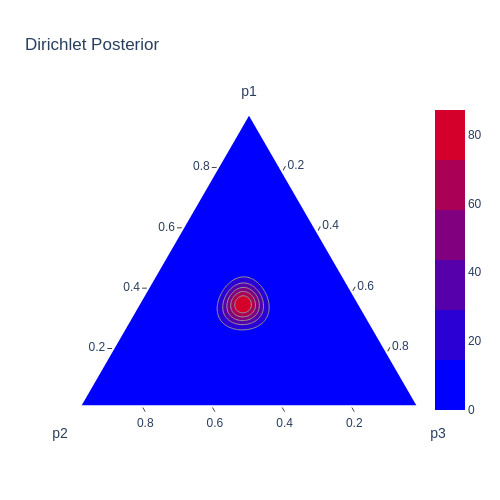

Posterior Parameters:  [37 36 33]


In [49]:
# Generate grid points for the simplex
num_points=100
p1 = np.linspace(0, 1, num_points)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, num_points)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
simplex_points = np.c_[p1, p2, p3]

# Compute densities for prior and posterior
prior_densities = dirichlet_prior.pdf(simplex_points.T)
posterior_densities = dirichlet_posterior.pdf(simplex_points.T)

# Visualize Dirichlet prior
fig_prior = ff.create_ternary_contour(
    simplex_points.T,
    prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
)
fig_prior.update_layout(title_text="Dirichlet Prior")
fig_prior.show('png')
print("Prior Parameters: ", alpha_prior)

# Visualize Dirichlet posterior
fig_posterior = ff.create_ternary_contour(
    simplex_points.T,
    posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
)
fig_posterior.update_layout(title_text="Dirichlet Posterior")
fig_posterior.show('png')
print("Posterior Parameters: ", alpha_posterior)